In [329]:
import numpy as np
import logging 
import matplotlib.pyplot as plt 
import copy

In [330]:
# logging.config()

In [ ]:
def ReLU(x, leaky=False, negative_slope=None):  # leaky relu optional
    if leaky:
        if negative_slope is None:
            negative_slope = 0.01
        return np.where(x < 0, x * negative_slope, x)
    return np.maximum(0, x)


In [332]:
def gradient_ReLU(x):
    return np.where(x>0,1,0)

In [ ]:
def normal_initialization(fan, weight_size):
    """He-style normal initializer helper (uses fan-in)."""
    std = np.sqrt(2.0 / fan)
    return np.random.normal(0, std, size=weight_size)


In [ ]:
def uniform_initialization(limit, weight_size):
    """Uniform initializer helper using given limit."""
    return np.random.uniform(-limit, limit, size=weight_size)


In [335]:
method_map={
        "uniform":uniform_initialization,
        "normal":normal_initialization
    }

In [ ]:
def initialize_layer(layer_in,layer_out,activation="linear",mode="he",method="uniform",bias=True):
    """ Returns weights and biases initialized based on fan-in/fan-out and chosen scheme.

    mode: 'he' or 'xavier' or 'random'
    method: 'uniform' or 'normal'
    """

    weights = None
    biases = np.zeros((1, layer_out)) if bias else None

    try:
        fan_in = layer_in
        fan_out = layer_out

        if mode.lower() == 'random':
            weights = np.random.random(size=(layer_in, layer_out))

        elif mode.lower() == 'he':
            if method == 'normal':
                weights = normal_initialization(fan_in, (layer_in, layer_out))
            else:  # uniform
                limit = np.sqrt(6.0 / fan_in)
                weights = uniform_initialization(limit, (layer_in, layer_out))

        elif mode.lower() == 'xavier':
            if method == 'normal':
                std = np.sqrt(1.0 / fan_in)
                weights = np.random.normal(0, std, size=(layer_in, layer_out))
            else:
                limit = np.sqrt(6.0 / (fan_in + fan_out))
                weights = uniform_initialization(limit, (layer_in, layer_out))

        else:
            raise ValueError("Only accepts 'random','he' and 'xavier' string as arguments.")

    except Exception as e:
        print(f"Error occured: {e}")

    return {"weight":weights,"bias":biases,"activation":activation}


In [337]:
layer_number=(2,3)
val=initialize_layer(2,3,method="uniform")
val['weight']


array([[-2.86805762, -3.09503523, -3.16632693],
       [ 3.57800458,  0.8174292 ,  1.49673681]])

In [338]:
custom_hidden_layers=[
    (8,"relu"),
    (4,"relu"),
    (2,"relu"),
    (1,"linear")
    ]



In [339]:
# Original Data
custom_X = np.array([[1, 2, 3], [2, 4, 6], [3, 6, 9], [4, 8, 12], [5, 10, 15]])
custom_Y = np.array([1, 2, 3, 4, 5])

# Extend the data with additional rows based on the same linear pattern, then add noise
num_new_samples = 100  # Add 100 new samples
noise_factor = 0.1  # Noise magnitude

# Generate additional X values by continuing the pattern (multiples of the first column)
additional_X = np.array([[i, 2*i, 3*i] for i in range(6, 6 + num_new_samples)])

# Add random noise to the new X data
noise = noise_factor * np.random.randn(*additional_X.shape)
additional_X_with_noise = additional_X + noise

# Generate corresponding Y values (linearly increasing)
additional_Y = np.array([i for i in range(6, 6 + num_new_samples)])

# Combine original and new samples
custom_X = np.vstack([custom_X, additional_X_with_noise])
custom_Y = np.hstack([custom_Y, additional_Y])

# Output the enlarged dataset
print(custom_X)
print(custom_Y)

[[  1.           2.           3.        ]
 [  2.           4.           6.        ]
 [  3.           6.           9.        ]
 [  4.           8.          12.        ]
 [  5.          10.          15.        ]
 [  5.88115907  11.99620854  18.03949849]
 [  7.0875081   13.81011861  20.84349037]
 [  7.99268105  15.96328154  24.02920084]
 [  9.04146969  17.91877383  26.93690395]
 [ 10.08208446  20.20999705  29.92107868]
 [ 11.1596721   22.0144375   33.05275056]
 [ 11.90880236  24.04355303  35.94519911]
 [ 13.00684945  26.0052734   38.88554934]
 [ 13.98162758  27.97782482  41.85260835]
 [ 15.12292426  29.95687538  44.91539241]
 [ 15.98170018  31.92125581  47.97016656]
 [ 16.93089516  33.94133697  51.07161159]
 [ 17.91623534  35.93193297  54.01178254]
 [ 19.0449088   37.97268646  56.82200122]
 [ 20.06172202  40.00303154  60.00906111]
 [ 21.07147099  42.03165072  63.1313199 ]
 [ 21.93071435  43.92508864  65.88778018]
 [ 22.93667341  45.85079027  69.00917723]
 [ 23.93868404  47.98706844  71.78

In [340]:
def build_network(hidden_layers,X):
    neural_network={}
    new_hidden=hidden_layers.copy()
    new_hidden.insert(0,(X.shape[1],"relu"))
    
    for layer in range(len(hidden_layers)):
        neural_network[f"Layer{layer}"]=initialize_layer(new_hidden[layer][0],new_hidden[layer+1][0],activation=new_hidden[layer+1][1])
    return neural_network
    

In [341]:
network=build_network(hidden_layers=custom_hidden_layers,X=custom_X)
network

{'Layer0': {'weight': array([[ 0.10731489, -3.69983197,  1.43995554,  0.96249399,  4.4418986 ,
           2.22885889,  1.37603793, -3.85675314],
         [ 0.7969222 , -4.05637852, -3.45169433,  4.39349132, -4.44428103,
          -2.92159972,  3.99489344, -0.29852203],
         [-0.62670868, -2.24781332,  2.41177211, -1.05758978, -1.61485637,
           3.70083186, -2.702517  , -3.13512502]]),
  'bias': array([[0., 0., 0., 0., 0., 0., 0., 0.]]),
  'activation': 'relu'},
 'Layer1': {'weight': array([[-4.31945095,  0.25031015,  4.06707504, -0.62806335],
         [ 2.02280566,  0.41036047,  1.47678328,  0.26285074],
         [-4.33403746, -1.43734751,  4.23210648, -3.63322227],
         [ 1.77768121, -1.84196826, -3.44746575,  2.44837988],
         [ 4.26445935,  0.48454952,  3.82070822, -3.73984529],
         [ 4.13342012, -0.36666411, -0.8588704 , -3.51468092],
         [ 2.60569934,  2.59908102, -2.86914741, -4.42699266],
         [ 3.25205149,  1.8423666 ,  3.47976983, -1.05983994]]),

In [342]:
network['Layer0']

{'weight': array([[ 0.10731489, -3.69983197,  1.43995554,  0.96249399,  4.4418986 ,
          2.22885889,  1.37603793, -3.85675314],
        [ 0.7969222 , -4.05637852, -3.45169433,  4.39349132, -4.44428103,
         -2.92159972,  3.99489344, -0.29852203],
        [-0.62670868, -2.24781332,  2.41177211, -1.05758978, -1.61485637,
          3.70083186, -2.702517  , -3.13512502]]),
 'bias': array([[0., 0., 0., 0., 0., 0., 0., 0.]]),
 'activation': 'relu'}

In [343]:
def forward_pass(input_network,X):
    
    
    network=input_network.copy()
    network_values={}
    
    result=X @ network['Layer0']["weight"] + network['Layer0']["bias"]
    
    network_values['Layer0']=[result]
    
    if network['Layer0']['activation']:
        result=ReLU(result)
        
    network_values['Layer0'].append(result)
    
    network.pop('Layer0')
    
    count=1
    for layer_name in network:
        
        params = network[layer_name]
        W = params["weight"]
        b = params["bias"]
        result=result @ W +b
        network_values[layer_name]=[result]
        count+=1
        
        if params["activation"].lower()=="relu":
            result=ReLU(result)
            
        network_values[layer_name].append(result)
        
        print(f"Result in layer {layer_name} : {result}")
    print(f"Total calculations: {count}")    
    return network_values 

In [344]:
forward_result=forward_pass(network,X=custom_X)
forward_result

Result in layer Layer1 : [[  38.24225467    0.            0.            0.        ]
 [  76.48450934    0.            0.            0.        ]
 [ 114.72676401    0.            0.            0.        ]
 [ 152.96901868    0.            0.            0.        ]
 [ 191.21127335    0.            0.            0.        ]
 [ 228.22981515    0.            0.            0.        ]
 [ 265.05041135    0.            0.            0.        ]
 [ 304.98356995    0.            0.            0.        ]
 [ 343.06632802    0.            0.            0.        ]
 [ 387.85470544    0.            0.            0.        ]
 [ 422.07463793    0.            0.            0.        ]
 [ 459.29555448    0.            0.            0.        ]
 [ 497.7839183     0.            0.            0.        ]
 [ 535.37269051    0.            0.            0.        ]
 [ 574.08515035    0.            0.            0.        ]
 [ 610.18464988    0.            0.            0.        ]
 [ 648.01694531    0.          

{'Layer0': [array([[-1.78966746e-01, -1.85560290e+01,  1.77188320e+00,
           6.57670730e+00, -9.29123255e+00,  7.48815503e+00,
           1.25827380e+00, -1.38591723e+01],
         [-3.57933492e-01, -3.71120579e+01,  3.54376641e+00,
           1.31534146e+01, -1.85824651e+01,  1.49763101e+01,
           2.51654761e+00, -2.77183445e+01],
         [-5.36900238e-01, -5.56680869e+01,  5.31564961e+00,
           1.97301219e+01, -2.78736977e+01,  2.24644651e+01,
           3.77482141e+00, -4.15775168e+01],
         [-7.15866984e-01, -7.42241159e+01,  7.08753282e+00,
           2.63068292e+01, -3.71649302e+01,  2.99526201e+01,
           5.03309521e+00, -5.54366890e+01],
         [-8.94833731e-01, -9.27801449e+01,  8.85941602e+00,
           3.28835365e+01, -4.64561628e+01,  3.74407752e+01,
           6.29136902e+00, -6.92958613e+01],
         [-1.11432942e+00, -1.10969888e+02,  1.05685219e+01,
           3.92874292e+01, -5.63222087e+01,  4.48213049e+01,
           7.26422137e+00, -8.281

In [345]:
def loss_function(y_true,y_pred,type='mse'):
    y_true=y_true.reshape(-1,1)
    y_pred=y_pred.reshape(-1,1)
    # print(y_true.shape,y_pred.shape)
    loss=np.sum((y_true-y_pred)**2)
    return loss/2

In [346]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [347]:
def derive_ReLU(activation):
    return np.where(activation>0,1,0)


In [348]:
def derive_linear(activation):
    return activation


In [349]:
def derive_sigmoid(activation):
    return activation * (1-activation)

In [350]:
def gradient_calculation(network,X,y,result):
    """
    Docstring for gradient_calculation
    
    :param network: Network structure of our NN, needed for updating network parameter
    :param X: For Forward pass
    :param y: For calculating loss of prediction
    :param result: Contains Activation and Linear combination values for all layers in forward pass
    """
    activations=[activations for (Z,activations) in result.values()]
    
    # reshape for no matrix errors
    output=activations[-1].reshape(-1,1) # final value of activations is being used as output
    y=y.reshape(-1,1)
    
    Z=[Z for (Z,activations) in result.values()]
    
    # Z, activations = map(list, zip(*result.values())), for doing above execution in a single step

    #dL/dZ of previous layers stored, this will be backpropagated through all layers
    # multiply by weights for getting gradients for weights, these will be default updates for biases
    linear_error_diff=[] 
    
    loss_value=loss_function(y,output) # considering MSE
    print(f"Current loss: {loss_value}")
    
    if network[f'Layer{len(network)-1}']['activation'].lower()=="relu":
        activation_grad=gradient_ReLU(activations[-1])
    else: # currently only considering linear and relu, if not relu then linear which is the same 
        activation_grad=1
        
    output_loss_diff= output - y # y_pred - y_true , MSE differential for final linear layer
    
    loss_by_Z=output_loss_diff * activation_grad
    linear_error_diff.append(loss_by_Z)
    
   
    
    
    for i in range(1,len(network)):
        
        current_layer_activation=network[f'Layer{len(network)-i}']['activation'].lower()
        if current_layer_activation=='relu':
            activation_grad=gradient_ReLU(activations[-(i+1)]) #current layer activation grad
        
        forward_layer_error=linear_error_diff[0] # dl/dz for forward layer
        forward_layer_weight=network[f"Layer{len(network)-i}"]["weight"].T # Transposed the weights of forward layer
        
        # print("fle",forward_layer_error.shape)
        # print("flw",forward_layer_weight.shape)
        # print("flw",activation_grad)
        
        error_Z_by_layer= forward_layer_error @ forward_layer_weight * activation_grad
        
        #dL/dZ for current layer= dl/dZ of forward layer x weights of forward layer x relu grad/ grad of current layer activation
        # for dL/dW of this layer, multiiply this by weights of this layer,
        # fo dl/lB of this layer, multiply this by bias of this layer
        # for backprop, element wise multiplication with activations, matrix multiplications with weights 
        linear_error_diff=[error_Z_by_layer] + linear_error_diff
        
    return linear_error_diff
    
    
    

In [351]:
grads=gradient_calculation(network=network,X=custom_X,y=custom_Y,result=forward_result)

Current loss: 1270969152.3096232


In [352]:
forward_result

{'Layer0': [array([[-1.78966746e-01, -1.85560290e+01,  1.77188320e+00,
           6.57670730e+00, -9.29123255e+00,  7.48815503e+00,
           1.25827380e+00, -1.38591723e+01],
         [-3.57933492e-01, -3.71120579e+01,  3.54376641e+00,
           1.31534146e+01, -1.85824651e+01,  1.49763101e+01,
           2.51654761e+00, -2.77183445e+01],
         [-5.36900238e-01, -5.56680869e+01,  5.31564961e+00,
           1.97301219e+01, -2.78736977e+01,  2.24644651e+01,
           3.77482141e+00, -4.15775168e+01],
         [-7.15866984e-01, -7.42241159e+01,  7.08753282e+00,
           2.63068292e+01, -3.71649302e+01,  2.99526201e+01,
           5.03309521e+00, -5.54366890e+01],
         [-8.94833731e-01, -9.27801449e+01,  8.85941602e+00,
           3.28835365e+01, -4.64561628e+01,  3.74407752e+01,
           6.29136902e+00, -6.92958613e+01],
         [-1.11432942e+00, -1.10969888e+02,  1.05685219e+01,
           3.92874292e+01, -5.63222087e+01,  4.48213049e+01,
           7.26422137e+00, -8.281

In [353]:
def update_params(network, grads, results, learning_rate,X,batch_size):
    
    if batch_size is None:
        batch_size=len(X)
    
    activations=[activations for (Z,activations) in results.values()]
    activations.insert(0,X)
    layer_number=0
    for error in grads:
        weight=network[f"Layer{layer_number}"]["weight"]
        bias=network[f"Layer{layer_number}"]["bias"]
        activation_previous=activations[layer_number]
        
        delta_weight=activation_previous.T @ error * 1/batch_size
        delta_bias = np.sum(error, axis=0, keepdims=True) * 1/batch_size
        
        weight -= learning_rate * delta_weight
        bias   -= learning_rate * delta_bias
        
        network[f"Layer{layer_number}"]["weight"]=weight
        network[f"Layer{layer_number}"]["bias"]=bias

        
         
        layer_number+=1
    return network
        

In [354]:
print(grads)

[array([[     -0.        ,       0.        ,   -1662.31437337,
            681.82729074,       0.        ,    1585.3678561 ,
            999.41255938,       0.        ],
       [     -0.        ,       0.        ,   -3324.62874674,
           1363.65458149,       0.        ,    3170.73571221,
           1998.82511877,       0.        ],
       [     -0.        ,       0.        ,   -4986.94312011,
           2045.48187223,       0.        ,    4756.10356831,
           2998.23767815,       0.        ],
       [     -0.        ,       0.        ,   -6649.25749348,
           2727.30916297,       0.        ,    6341.47142442,
           3997.65023753,       0.        ],
       [     -0.        ,       0.        ,   -8311.57186685,
           3409.13645371,       0.        ,    7926.83928052,
           4997.06279692,       0.        ],
       [     -0.        ,       0.        ,   -9921.35397552,
           4069.41671804,       0.        ,    9462.10652678,
           5964.89203731,     

In [355]:
update_params(network=network,X=custom_X,grads=grads,results=forward_result,learning_rate=0.01,batch_size=None)

{'Layer0': {'weight': array([[ 1.07314895e-01, -3.69983197e+00,  6.19782670e+04,
          -2.54199162e+04,  4.44189860e+00, -5.91057660e+04,
          -3.72601795e+04, -3.85675314e+00],
         [ 7.96922202e-01, -4.05637852e+00,  1.23934464e+05,
          -5.08309086e+04, -4.44428103e+00, -1.18203902e+05,
          -7.45096541e+04, -2.98522028e-01],
         [-6.26708682e-01, -2.24781332e+00,  1.85898534e+05,
          -7.62496009e+04, -1.61485637e+00, -1.77287515e+05,
          -1.11766712e+05, -3.13512502e+00]]),
  'bias': array([[   0.        ,    0.        ,  881.05730653, -361.38105158,
             0.        , -840.27423184, -529.70710703,    0.        ]]),
  'activation': 'relu'},
 'Layer1': {'weight': array([[-4.31945095e+00,  2.50310152e-01,  4.06707504e+00,
          -6.28063347e-01],
         [ 2.02280566e+00,  4.10360467e-01,  1.47678328e+00,
           2.62850739e-01],
         [-2.53357156e+04, -1.43734751e+00,  4.23210648e+00,
          -3.63322227e+00],
         [-9.4

In [356]:
def train(
    network,
    X,
    y,
    epochs=200,
    learning_rate=0.01,
    batch_size=None,
    verbose=True
):
    loss_history = []

    for epoch in range(epochs):
        # Forward pass
        forward_result = forward_pass(network, X)

        # Loss (for tracking only)
        output = list(forward_result.values())[-1][1]
        loss = loss_function(y, output)
        loss_history.append(loss)

        # Backward pass
        grads = gradient_calculation(
            network=network,
            X=X,
            y=y,
            result=forward_result
        )

        # Parameter update
        network = update_params(
            network=network,
            grads=grads,
            results=forward_result,
            learning_rate=learning_rate,
            X=X,
            batch_size=batch_size
        )

        if verbose and epoch % 20 == 0:
            print(f"Epoch {epoch:4d} | Loss: {loss:.6f}")

    return network, loss_history


In [357]:
trained_network, loss_history = train(
    network=network,
    X=custom_X,
    y=custom_Y,
    epochs=1000,
    learning_rate=0.01,
    batch_size=None,
    verbose=True
)


Result in layer Layer1 : [[0.00000000e+00 0.00000000e+00 3.67526222e+06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.34679572e+06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.10183292e+07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.46898627e+07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.83613962e+07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.20308444e+07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.55046902e+07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.93777915e+07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.29661638e+07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.67886478e+07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.04815526e+07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.40179392e+07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.76481835e+07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.12727883e+07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.50197906e+07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+0

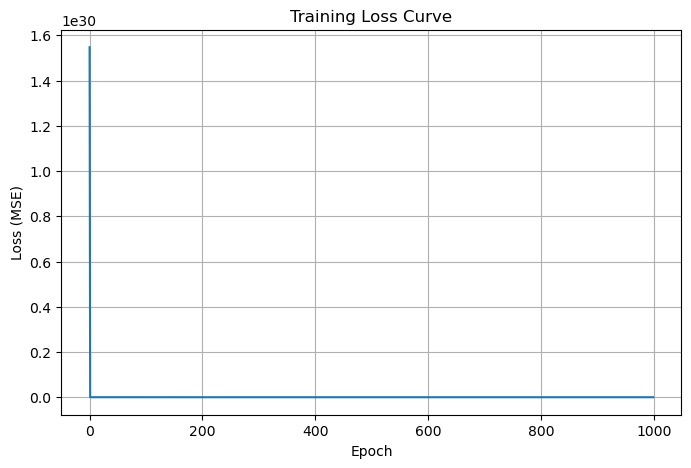

In [358]:
plt.figure(figsize=(8, 5))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


In [359]:
# Before training
forward_before = forward_pass(build_network(custom_hidden_layers, custom_X), custom_X)
loss_before = loss_function(custom_Y, list(forward_before.values())[-1][1])

# After training
forward_after = forward_pass(trained_network, custom_X)
loss_after = loss_function(custom_Y, list(forward_after.values())[-1][1])

print("Loss before training:", loss_before)
print("Loss after training :", loss_after)


Result in layer Layer1 : [[   0.           41.22673088    0.            0.        ]
 [   0.           82.45346177    0.            0.        ]
 [   0.          123.68019265    0.            0.        ]
 [   0.          164.90692354    0.            0.        ]
 [   0.          206.13365442    0.            0.        ]
 [   0.          244.61534991    0.            0.        ]
 [   0.          287.66927232    0.            0.        ]
 [   0.          328.7901237     0.            0.        ]
 [   0.          370.7082798     0.            0.        ]
 [   0.          418.43252187    0.            0.        ]
 [   0.          456.74114734    0.            0.        ]
 [   0.          494.00148594    0.            0.        ]
 [   0.          536.85940265    0.            0.        ]
 [   0.          577.23593454    0.            0.        ]
 [   0.          620.59666528    0.            0.        ]
 [   0.          657.92029822    0.            0.        ]
 [   0.          697.89337161  

In [360]:
def predict(network, X):
    """
    Inference only (forward pass)
    """
    result = forward_pass(network, X)
    output = list(result.values())[-1][1]  # final activations
    return output


In [361]:
y_pred = predict(trained_network, custom_X)

print("Predictions:")
print(y_pred.reshape(-1))

print("Ground truth:")
print(custom_Y)


Result in layer Layer1 : [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]


In [362]:
x_new = np.array([[2, 4, 6]])  # shape (1, 3)
y_new_pred = predict(trained_network, x_new)

print("Predicted value:", y_new_pred.item())


Result in layer Layer1 : [[0. 0. 0. 0.]]
Result in layer Layer2 : [[0. 0.]]
Result in layer Layer3 : [[-64990283.89211684]]
Total calculations: 4
Predicted value: -64990283.892116845
